In [1]:
import sys

In [2]:
sys.version_info

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)

In [3]:
sys.platform

'win32'

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys


from matplotlib import font_manager, rc

if sys.platform  == 'darwin':
    path = '/Library/Fonts/AppleGothic.ttf'  
elif sys.platform == 'win32':
    path = "c:/Windows/Fonts/malgun.ttf"
else:
    print('Unknown system... sorry~~~~') 
    
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [5]:
import FinanceDataReader as fdr
fdr.__version__

'0.8.0'

#  FinanceDataReader 사용자 안내서

> https://financedata.github.io/posts/finance-data-reader-users-guide.html


> https://github.com/FinanceData/FinanceDataReader/wiki/Users-Guide

In [6]:
#  차트 설정
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,6)            ## 캔버스 사이즈를 지정한다 
plt.rcParams['lines.linewidth'] = 2                ##  선 그래프 폭을 설정한다 
plt.rcParams["axes.grid"] = True                   ## 그리드를 설정한다 
plt.rcParams['axes.linewidth'] = 2.0                ## axes 축에 대한 굵기를 진하게 처리한다


# 환율

    심볼	설명
    USD/KRW	달러당 원화 환율
    USD/EUR	달러당 유로화 환율
    USD/JPY	달러당 엔화 환율
    CNY/KRW	위엔화 원화 환율
    EUR/USD	유로화 달러 환율
    USD/JPY	달러 엔화 환율
    JPY/KRW	엔화 원화 환율
    AUD/USD	오스트레일리아 달러 환율
    EUR/JPY	유로화 엔화 환율
    USD/RUB	달러 루블화

## 예제 14-2-1 환율 및 암호화폐 조회하기 

In [7]:
import FinanceDataReader as fdr                     ## 금융정보를 조회하는 모듈을 사용한다 


df_USDKRW = fdr.DataReader('USD/KRW','2001')       ## 미국 달로와 원화 거래에 대한 정보를 가져온다 

In [8]:
df_USDKRW.head()

,Close,Open,High,Low,Change
Date,,,,,
2001-01-02,1278.0,1261.0,1281.0,1259.0,0.0103
2001-01-03,1270.5,1278.0,1292.5,1270.5,-0.0059
2001-01-04,1263.3,1270.5,1270.5,1241.0,-0.0057
2001-01-05,1262.5,1263.3,1275.0,1258.0,-0.0006
2001-01-08,1263.3,1265.3,1268.3,1260.3,0.0006


In [9]:
df_USDKRW.tail()

,Close,Open,High,Low,Change
Date,,,,,
2019-10-22,1173.09,1173.33,1175.00,1169.87,0.0005
2019-10-23,1170.67,1173.07,1177.30,1170.48,-0.0021
2019-10-24,1175.21,1169.77,1175.21,1166.99,0.0039
2019-10-25,1171.82,1175.28,1175.96,1170.91,-0.0029
2019-10-28,1169.92,1171.50,1172.00,1168.05,-0.0016


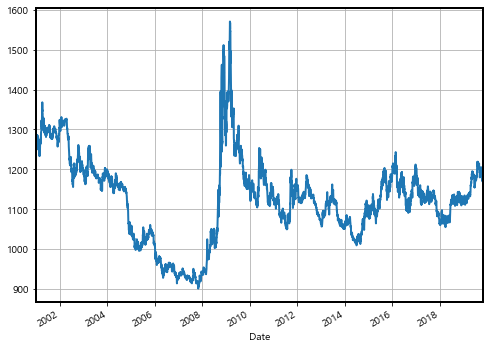

In [10]:
df_USDKRW['Close'].plot(figsize=(8,6))

# 암호화폐 가격 (KRW)
    
    암호 화폐 원화 가격 (빗썸)

        심볼	설명
    BTC/KRW	비트코인 원화 가격
    ETH/KRW	이더리움 원화 가격
    XRP/KRW	리플 원화 가격
    BCH/KRW	비트코인 캐시 원화 가격
    EOS/KRW	이오스 원화 가격
    LTC/KRW	라이트 코인 원화 가격
    XLM/KRW	스텔라 원화 가격

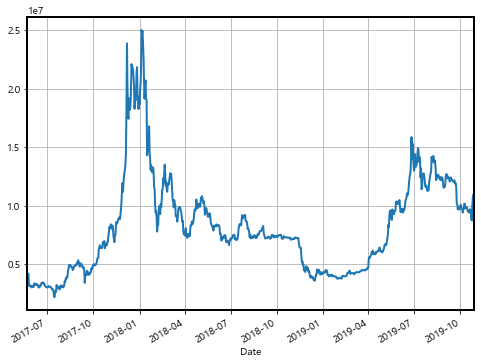

In [11]:
import FinanceDataReader as fdr

                                                 # 비트코인 원화 가격 (빗썸), 2016년~현재
df = fdr.DataReader('BTC/KRW', '2016')
df['Close'].plot(figsize=(8,6))

## 예제 14-2-2  주가지수 종목 확인하기  

## 한국 etf 종목 'KR' 생략가능

In [12]:
df_etf_kr = fdr.EtfListing('KR')                         ## 한국 ETF 종목 가져오기 한국이 기본이라 'KR' 생략가능

In [13]:
df_etf_kr.head()

,Symbol,Name
0,069500,KODEX 200
1,102110,TIGER 200
2,122630,KODEX 레버리지
3,153130,KODEX 단기채권
4,273130,KODEX 종합채권(AA-이상)액티브


In [14]:
df_etf_kr.shape

(444, 2)

In [15]:
                                                      # KODEX 200 (069500)
df_kodex = fdr.DataReader('069500', '2019-01-01')     # 2019년 1월 1일부터 현재까지

In [16]:
df_kodex.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,26285,26324,25700,25785,4795980,-0.011652
2019-01-03,25779,25809,25505,25535,5649255,-0.009696
2019-01-04,25524,25764,25455,25731,10281475,0.007676
2019-01-07,26054,26290,26039,26099,5700324,0.014302
2019-01-08,26108,26186,25912,25927,4670564,-0.006590


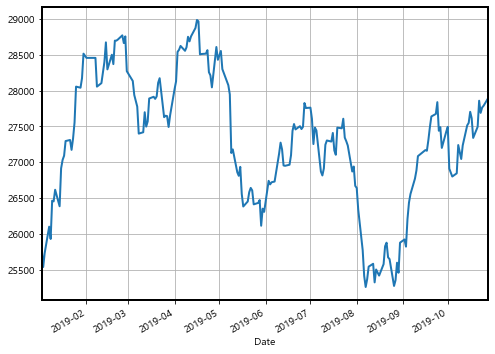

In [17]:
df_kodex['Close'].plot(figsize=(8,6))

## 미국 ETF 종목 

In [18]:
df_etf_us = fdr.EtfListing('US')                       ## 미국 종목 가져오기 

In [19]:
df_etf_us.head()

,Symbol,Name
0,GDX,VanEck Vectors Gold Miners
1,EEM,iShares MSCI EM
2,SPY,SPDR S&P 500
3,AMLP,Alerian MLP
4,XLF,Financial Select Sector SPDR Fund


In [20]:
df_etf_us.shape

(1000, 2)

## SPDR S&P 500 ETF

In [21]:
df_snp = fdr.DataReader('SPY', '2019-01-01', '2019-06-30')        ## SPY 종목을 기간에 맞춰 가져오기 

In [22]:
df_snp.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2019-01-01,249.92,249.92,249.92,249.92,0.0,0.0000
2019-01-02,250.18,245.98,251.21,245.95,126930000.0,0.0010
2019-01-03,244.21,248.23,248.57,243.67,144140000.0,-0.0239
2019-01-04,252.39,247.59,253.11,247.17,142630000.0,0.0335
2019-01-05,252.39,252.39,252.39,252.39,0.0,0.0000


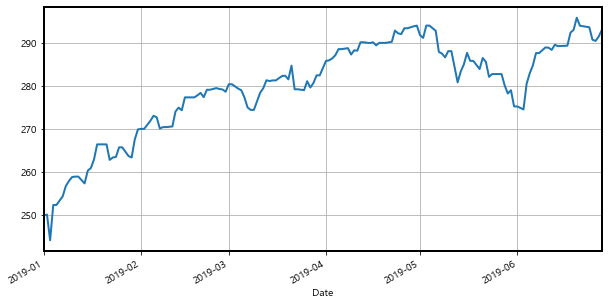

In [33]:
df_snp['Close'].plot(figsize=(10,5))
plt.show()

## 이전까지만 책에 반영

In [24]:
df_etf_hk = fdr.EtfListing('HK') 

In [25]:
df_etf_hk.head()

,Symbol,Name
0,2800,AMP Capital Global Infrastructure Securities
1,7500,CSOP Hang Seng Index Daily (-2x) Inverse
2,2822,CSOP FTSE China A50
3,7200,CSOP Hang Seng Daily 2X Leveraged
4,2823,iShares FTSE A50 China


In [26]:
df_csop = fdr.DataReader('7500', '2019-01-01', '2019-06-30', country='HK')

In [27]:
df_csop.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2019-05-29,7.22,7.24,7.25,7.12,29560000.0,0.0112
2019-05-30,7.27,7.22,7.33,7.17,24100000.0,0.0069
2019-05-31,7.40,7.32,7.41,7.25,27730000.0,0.0179
2019-06-03,7.41,7.50,7.50,7.34,37710000.0,0.0014
2019-06-04,7.46,7.37,7.51,7.36,21010000.0,0.0067


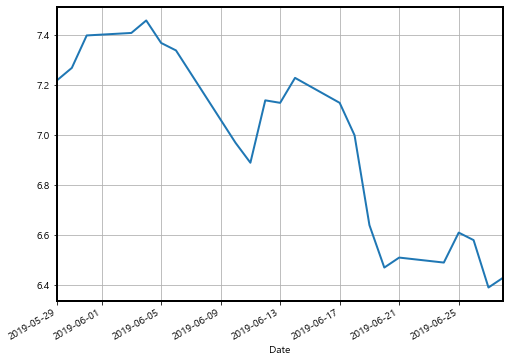

In [28]:
df_csop['Close'].plot(figsize=(8,6))

## KS11 (KOSPI 지수), 2015년~현재

## 여러 나라 주가지수 
JP225   닛케이 225 선물
STOXX50  유렵 STOXX 50
HSI   항셍 (홍콩)
CSI300  CSI 300 (중국)
SSEC  상해 종합
UK100  영국 FTSE
DE30  독일 DAX 30
FCHI  프랑스 CAC 40

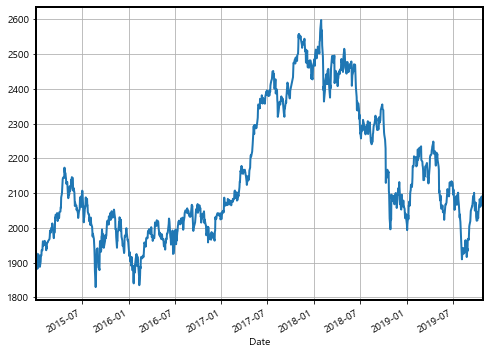

In [29]:
df = fdr.DataReader('KS11', '2015')
df['Close'].plot(figsize=(8,6))

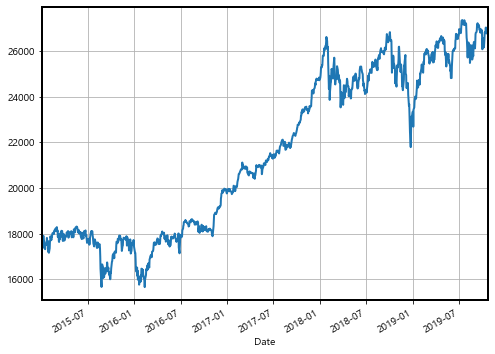

In [30]:
# 다우지수, 2015년~현재

df = fdr.DataReader('DJI', '2015')
df['Close'].plot(figsize=(8,6))